In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn as sk
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_circles
from tqdm import tqdm
plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

### Ecrire toutes les fonctions :

In [2]:
def init(n0 , n1 , n2):
    
    W1 = np.random.randn(n1 , n0)
    b1 = np.zeros((n1, 1))
    
    W2 = np.random.randn(n2 , n1) 
    b2 = np.zeros((n2, 1))
    
    parametres = {
        'W1' : W1,
        'b1' : b1,
        'W2' : W2,
        'b2' : b2
    }
    return parametres

In [3]:
def foward_propa(X , parametres):
    
    b1 = parametres['b1']
    b2 = parametres['b2']
    W1 = parametres['W1']
    W2 = parametres['W2']
    
    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))
    
    activations = {
        'A1' : A1,
        'A2' : A2
    }
    
    return activations

In [4]:
def back_propa(activations , parametres , X , y):
    
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']
    
    m = X.shape[1]
    
    dZ2 = A2 - y
    dZ1 = np.dot(W2.T , dZ2) * A1 * (1 - A1)
    
    dW2 = (1 / m) * dZ2.dot(A1.T)
    db2 = (1 / m) * np.sum(dZ2 , axis = 1 , keepdims = True)
     
    dW1 = (1 / m) * dZ1.dot(X.T)
    db1 = (1 / m) * np.sum(dZ1 , axis = 1 , keepdims = True)
    
    gradients = {
        'dW1' : dW1,
        'dW2' : dW2,
        'db1' : db1,
        'db2' : db2
    }
    
    return gradients   

In [5]:
def update(parametres , gradients , rate):
    
    W1 = parametres['W1']
    b1 = parametres['b1']
    
    W2 = parametres['W2']
    b2 = parametres['b2']
    
    dW1 = gradients['dW1']
    db1 = gradients['db1']
    
    dW2 = gradients['dW2']
    db2 = gradients['db2']
    
    W1 = W1 - rate * dW1
    W2 = W2 - rate * dW2
    b1 = b1 - rate * db1
    b2 = b2 - rate * db2
    
    parametres = {
        'W1' : W1,
        'W2' : W2,
        'b1' : b1,
        'b2' : b2
    }
    
    return parametres

In [6]:
def predict(X , parametres):
    activations = foward_propa(X , parametres)
    
    A2 = activations['A2']
    
    return A2 >= 0.5

In [7]:
def neural_network(X_train , y_train , n1 , rate = 0.1 , niter = 1000):
    
    # init des paramtres
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]

    parametres = init(n0 , n1 , n2)
    
    #init pour graph 
    loss = []
    acc = []
    
    for step in tqdm(range(niter)):
        
        # foward propagation : 
        activations = foward_propa(X_train , parametres)
        
        # back propagration : 
        gradients = back_propa(activations , parametres , X_train , y_train)
        
        # update des parametres
        parametres = update(parametres , gradients , rate)
        
        if step % 10 == 0:
            log_loss1 = log_loss(y_train.flatten() , activations['A2'].flatten())
            loss.append(log_loss1)
            
            y_predict = predict(X_train , parametres)
            acc.append(accuracy_score(y_predict.flatten() , y_train.flatten()))
    
    accuracy_score_s = accuracy_score(predict(X_train , parametres) , y_train )
    print("ce model est précis à : " + str(accuracy_score_s*100) + " %")
    plt.plot(loss)
    plt.show()
    plt.plot(acc)
    plt.show()

    return parametres

la dim de X est :  (2, 100)
la dim de y est :  (1, 100)


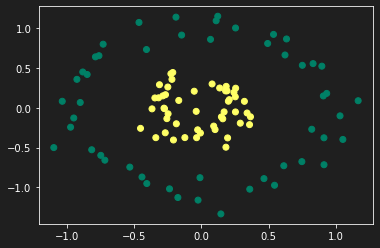

In [8]:
X , y = make_circles(n_samples = 100 , noise = 0.1 , factor = 0.3 ,  random_state = 0)
y = y.reshape((y.shape[0] , 1))

# Nous devons penser à transposer X et y 

X = X.T
y = y.T
print("la dim de X est : " , X.shape)
print("la dim de y est : " , y.shape)
plt.scatter(X[0 , :] , X[1 , :] , c = y , cmap = "summer")

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 3347.34it/s]


ce model est précis à : 0.0 %


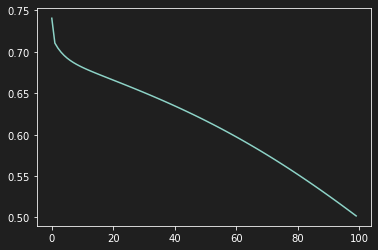

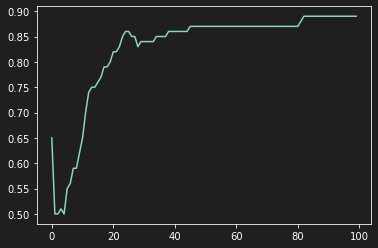

{'W1': array([[ 1.17019484, -0.87446326],
        [-1.04276724,  0.76894341],
        [-0.65281843, -0.78617734],
        [-0.80216328,  1.54591028],
        [-2.99590532,  0.99686752],
        [ 0.19024869,  0.32212119],
        [-1.71140875, -0.11481006],
        [ 2.03311517, -0.89271782],
        [ 0.22638815, -0.69226858],
        [-0.98992912, -0.16116125],
        [-1.84194574, -0.39756805],
        [-1.55869339, -0.83058021],
        [-0.5495045 ,  1.01126336],
        [ 1.6058398 , -1.16175342],
        [ 1.60985501, -0.77053356],
        [ 0.13867027,  0.8665636 ],
        [-0.20187332,  1.36832797],
        [-0.34778112,  0.42916148],
        [-0.56416044, -0.84923366],
        [-1.41113899, -0.05908466],
        [-0.72466481, -1.7082195 ],
        [-0.29144425, -0.51539506],
        [ 0.71956777, -1.5288622 ],
        [-0.13071864,  0.84224044],
        [-0.16880359,  1.27964181],
        [-0.04874234, -0.45887561],
        [-0.81357749, -0.05835935],
        [-0.74024685, 

In [9]:
neural_network(X, y , 32 , rate = 0.1 , niter = 1000)

In [10]:
def neural_network_train_test(X_train , y_train , X_test , n1 , rate = 0.1 , niter = 1000):
    
    # init des paramtres
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]

    parametres = init(n0 , n1 , n2)
    
    #init pour graph 
    train_loss = []
    train_acc = []
    test_acc = []
    test_loss = []
    
    for step in tqdm(range(niter)):
        
        # foward propagation : 
        activations = foward_propa(X_train , parametres)
        
        # back propagration : 
        gradients = back_propa(activations , parametres , X_train , y_train)
        
        # update des parametres
        parametres = update(parametres , gradients , rate)
        
        activation_test = foward_propa(X_test , parametres)
        
        if step % 10 == 0:
            
            log_loss1 = log_loss(y_train.flatten() , activations['A2'].flatten())
            train_loss.append(log_loss1)
            
            y_predict = predict(X_train , parametres)
            train_acc.append(accuracy_score(y_predict.flatten() , y_train.flatten()))
            
            
    predict_test = predict(X_test , parametres)
    print("le test se trouve dans la zone : " + str(predict_test))
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()
    plt.show()
    
    return [activation_test['A2'] , predict_test , parametres]

In [11]:
point_test1 = np.array([[0.0 , 1.0],[0.0 , -1.0]])
point_test1 = point_test1.reshape(point_test1.shape[0] , 2).T
pt2 = np.array([[0.0 , 0.0],[0.0 , 0.4]])
pt2 = pt2.T
pt3 = np.array([[0.0 , 0.0] , [0.0 , 0.4] , [0.5 , 0.0] , [-0.5,0.5]])
pt3 = pt3.T

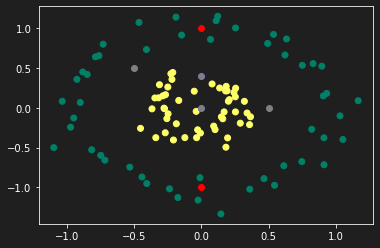

In [12]:
plt.scatter(X[0 , :] , X[1 , :] , c = y , cmap = "summer")
plt.scatter(point_test1[0] , point_test1[1] , c='red')
plt.scatter(pt2[0] , pt2[1] , c='blue')
plt.scatter(pt3[0,:],pt3[1,:] , c = 'grey')

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 2573.98it/s]


le test se trouve dans la zone : [[False False]]


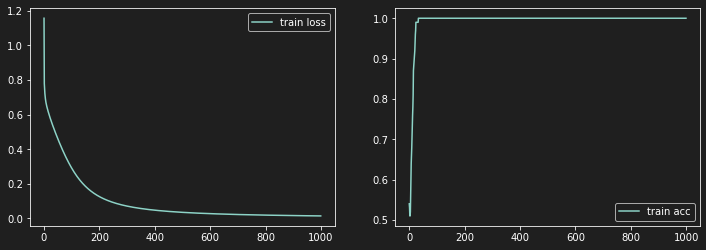

In [13]:
A = neural_network_train_test(X , y , point_test1, 32 , rate = 0.1 , niter = 10000)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1563.04it/s]


le test se trouve dans la zone : [[ True  True]]


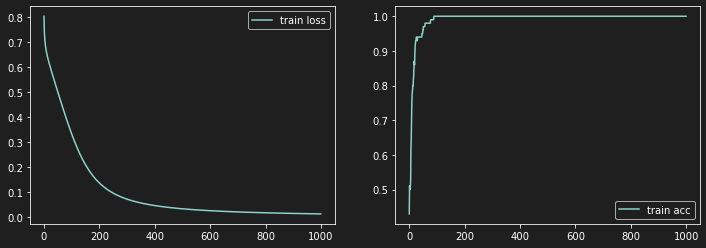

In [14]:
B = neural_network_train_test(X , y , pt2, 32 , rate = 0.1 , niter = 10000)

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1529.70it/s]


le test se trouve dans la zone : [[ True  True  True False]]


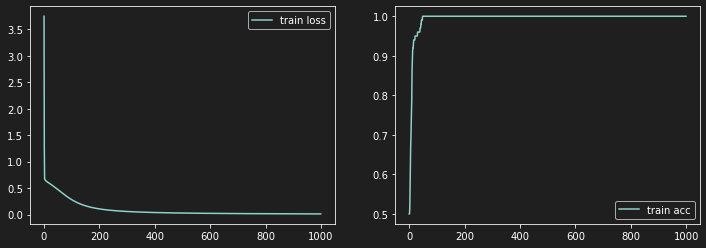

In [15]:
C = neural_network_train_test(X , y , pt3, 32 , rate = 0.1 , niter = 10000)